### Imports

In [273]:
import sys
import math
import humanize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('dark_background')

### Read dataset

In [274]:
f = open("38430-0002-Data.txt", 'r')
data = f.readlines()
f.close()

### Extract data from file and insert it into a 2D array

In [275]:
datalist = []
datalist_item = []

for line in data:
    year = int(line[0:4]) #YEAR

    # PERSONAL INFORMATION

    weight = float(line[391:406]) #V3080
        # implied 5 decimal places from the right
    sex = int(line[165:166]) #V3018
        # 1 male, 2 female, 8 residue, 9 oou
    if year < 2003:
        race = int(line[173:175]) #V2040A
    else:
        race = int(line[175:177]) #V2040B
        # 01 white, 02 black, 03 native, 04 asian
        # AFTER 2003:
        # 05 pacific islander, 06 white-black, 07 white-native, 08 white-asian
        # 09 white-pacific islander, 10 black-native, 11 black-asian, 12 black-pacific islander
        # 13 native-asian, 14 asian-pacific islander, 15 white-black-native, 16 white-black-asian
        # 17 white-native-asian, 18 white-asian-hawaiian, 19 two or three, 20 four or five
        # 98 residue, 99 oou
    
    # SCREEN QUESTIONS

    something_stolen = int(line[200:201]) # V3034
    attacked = int(line[214:215]) #V3040
    attacked_known = int(line[222:223]) #V3044
    unwanted_sex = int(line[226:227]) #V3046
        # 1 yes, 2 no, 3 refused, 8 residue, 9 oou

    datalist_item.append(year)
    datalist_item.append(weight)
    datalist_item.append(sex)
    datalist_item.append(race)
    datalist_item.append(something_stolen)
    datalist_item.append(unwanted_sex)
    datalist.append(datalist_item)
    datalist_item = []


In [ ]:
"""
number_of_times_something_stolen = int(line[201:204]) # V3035
    # 000 thru 996 valid, 998 residue, 999 oou
breakin_or_attempted = int(line[204:206]) # V3036
    # 1 yes, 2 no, 3 refused, 8 residue, 9 oou
number_of_times_breakin_or_attempted = int(line[206:209]) #V3037
    # 000 thru 996 valid, 998 residue, 999 oou
motor_vehicle_theft = int(line[209:211]) #3038
    # 1 yes, 2 no, 3 refused, 8 residue, 9 oou, -2 invalid after 2016 Q4
number_of_times_motor_vehicle_theft = int(line[211:214]) #V3037
    # 000 thru 996 valid, 998 residue, 999 oou
"""

### Create DataFrame

In [276]:
df = pd.DataFrame(datalist, columns=['year', 'weight', 'sex', 'race', 'something_stolen', 'unwanted_sex'])
df.head(10)

,year,weight,sex,race,something_stolen,unwanted_sex
0,1992,1140.887,1,1,2,2
1,1992,1214.611,2,1,2,2
2,1992,1268.634,1,1,2,2
3,1992,1296.574,2,1,2,2
4,1992,1290.251,2,1,2,2
5,1992,1404.300,1,1,2,2
6,1992,2213.644,1,1,2,2
7,1992,2116.230,2,1,2,2
8,1992,2145.415,1,3,2,2
9,1992,0.000,2,1,9,9


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752401 entries, 0 to 5752400
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   year              int64  
 1   weight            float64
 2   sex               int64  
 3   race              int64  
 4   something_stolen  int64  
 5   unwanted_sex      int64  
dtypes: float64(1), int64(5)
memory usage: 263.3 MB


#### Sum of all weights

In [277]:
# weight = approximation of people over 12 in the country represented by each individual surveyed
sum_weights = df['weight'].sum()
# divide by 30 to get rough average of total US population over 12 from 1992-2021
avg_weight = humanize.intcomma(sum_weights / 30)
print(avg_weight)

245,953,377.99231195


### Plot weight of people per year who report someting stolen

#### Yes and no responses

<AxesSubplot:xlabel='year,something_stolen'>

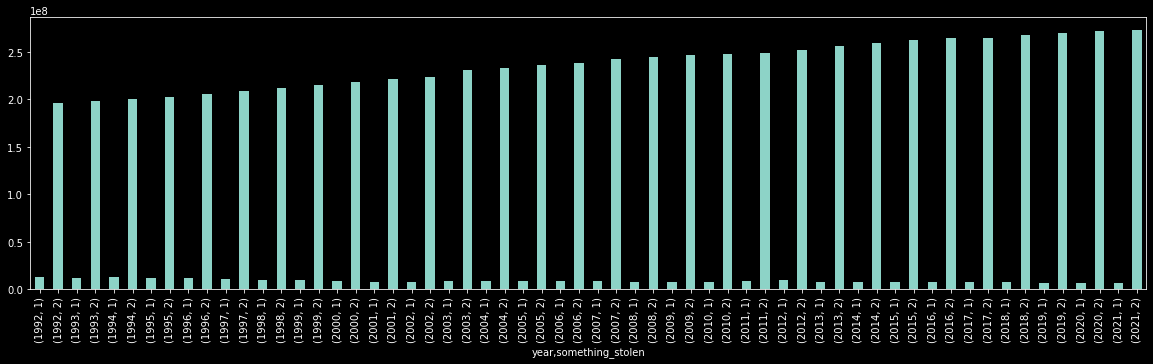

In [278]:
# filter out all responces other than yes and no
df_filtered = df[df['something_stolen'] < 3]
# plot sum of the weights from each category
stolen_data = df_filtered.groupby(['year', 'something_stolen'])['weight'].sum()
stolen_data.plot(x='year', y='something_stolen', kind='bar', figsize=(20,5))

#### Linear regression on yes responses

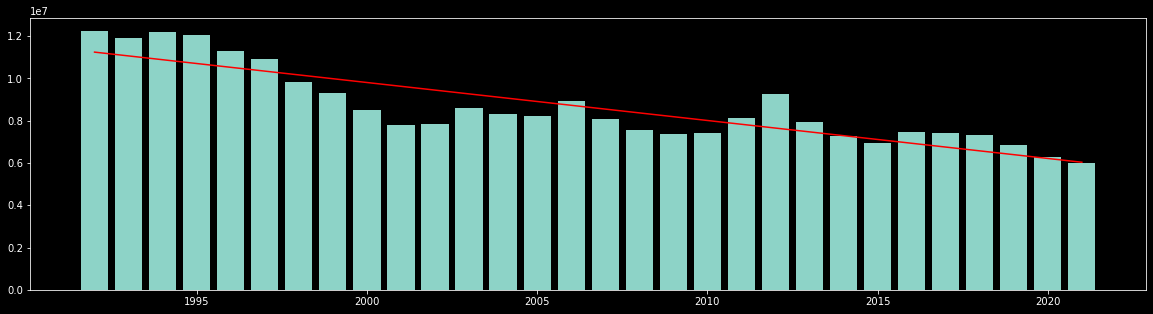

In [282]:
# filter out all responces other than yes
df_filtered = df[df['something_stolen'] == 1]

# plot sum of the weights from each category
stolen_data_yes = df_filtered.groupby(['year', 'something_stolen'])['weight'].sum()
vals = stolen_data_yes.to_list()

# linear regression line with numpy
x = range(1992,2022)
y = vals
regression = np.polyfit(x, y, deg=1)
trendline = np.polyval(regression, x)
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.plot(x, trendline, color='red')


### Plot weight of people who report unwanted sex

#### Female

<AxesSubplot:xlabel='year'>

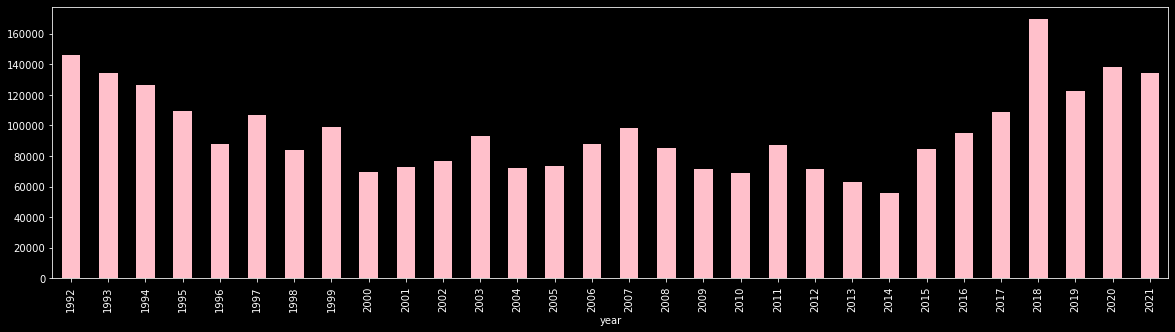

In [283]:
df_filtered = df[(df['unwanted_sex'] == 1) & (df['sex'] == 2)] 
unwanted_sex_data_female = df_filtered.groupby(['year'])['weight'].sum()
unwanted_sex_data_female.plot(x='year', y='weight', kind='bar', figsize=(20,5), color='pink')

#### Male

<AxesSubplot:xlabel='year'>

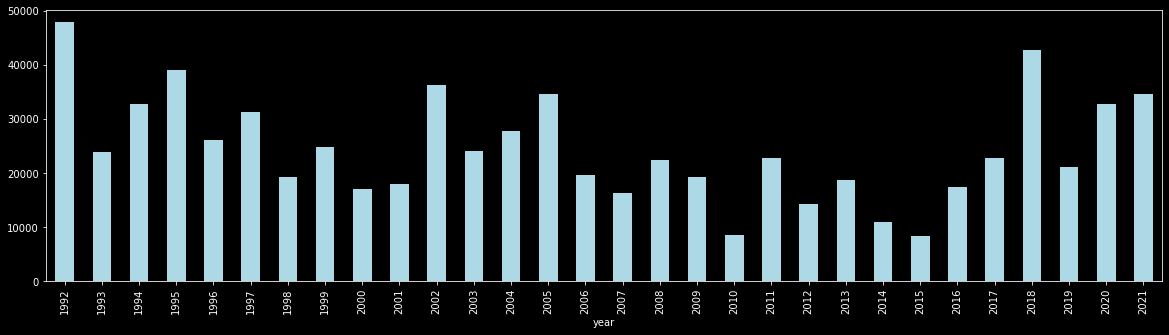

In [284]:
df_filtered = df[(df['unwanted_sex'] == 1) & (df['sex'] == 1)] 
unwanted_sex_data_male = df_filtered.groupby(['year'])['weight'].sum()
unwanted_sex_data_male.plot(x='year', y='weight', kind='bar', figsize=(20,5), color='lightblue')

#### Both

<AxesSubplot:xlabel='year,sex'>

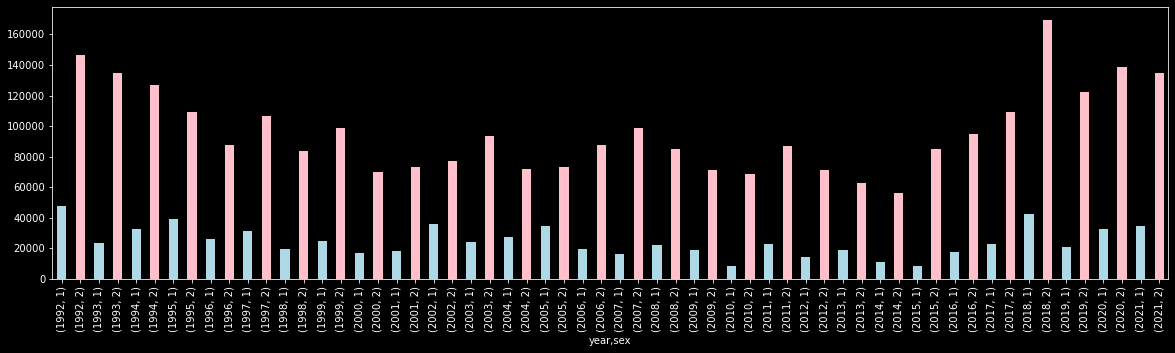

In [285]:
df_filtered = df[(df['unwanted_sex'] == 1) & (df['sex'] < 3)] 
unwanted_sex_data = df_filtered.groupby(['year', 'sex'])['weight'].sum()
unwanted_sex_data.plot(x='year', y='sex', kind='bar', figsize=(20,5), color=['lightblue', 'pink'])